In [344]:
import numpy as np
import matplotlib.pylab as plt
from scipy.special import gamma
import scipy.integrate as integrate

In [345]:
NA = 6.02214179e23# Avogadro number / mol^-1

In [346]:
q  =  1.075
E  = np.linspace(0,10,1000)
bq = lambda q: np.sqrt(q-1)*(0.25)*(3*q-1)*(1+q)*gamma(0.5+(1/(q-1)))/gamma(1/(q-1))
Bq = bq(q)
m1 = 2
m2 = 2
M  = m1+m2
A  = (m1*m2)/(m1+m2)
Zi = 1
Zj = 1
#T9 = np.linspace(0.1,1,1000)

## ddn3He

Text(0.5, 1.0, '$S\\;(E)\\; for\\;the\\; reaction\\; ^{2}H(d,n)^{3}He$')

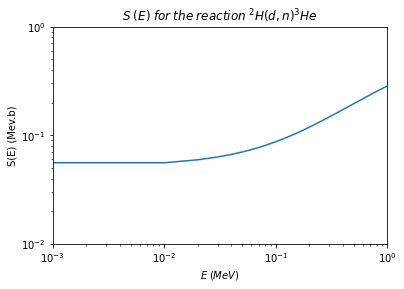

In [347]:
def S_E2(E):
    return 0.0522 + 0.370*E - 0.196*E*E + 0.0672*E*E*E - 0.00885*E*E*E*E
plt.plot(E,S_E2(E)) 
plt.yscale('log')
plt.xscale('log')
plt.ylim((0.01,1))
plt.xlim((10**(-3),1))
plt.xlabel(r'$E\;(MeV)$')
plt.ylabel(r'S(E) (Mev.b)')
plt.title(r'$S\;(E)\; for\;the\; reaction\; ^{2}H(d,n)^{3}He$')

In [348]:
kB = 8.617343e-11# Boltzmann constant / MeV/K
T9=np.linspace(0.01,1)


In [349]:
def integral2_mb(E,T9):
    return S_E2(E)*0.5*np.exp(-(E/(0.08617343*T9) + 0.9898*Zi*Zj*np.sqrt(A/E)))

In [350]:
rate2_mb=[]
for T in T9:
    rate2_mb.append(integrate.quad(integral2_mb,0,np.inf,args=(T,)))

In [351]:
rate2_mb=np.array(rate2_mb)
rate_actual=rate2_mb[:,0]*np.sqrt(8/(np.pi*A))*(1/(0.08617343*T9)**1.5)*NA


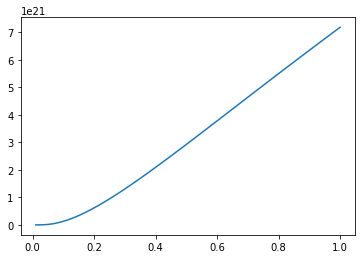

In [352]:
plt.plot(T9,rate_actual)

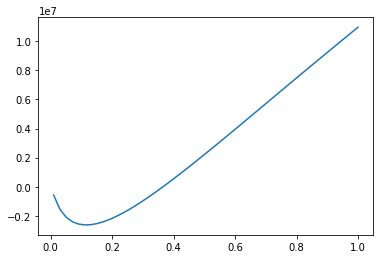

In [353]:
fddp=T9**(-2/3)*np.exp(-T9**(-1/3))*(-1.84664*(10**6) + 1.22986*(10**7)*(T9**1/3)
-1.3761*(10**7)*(T9**(2/3)) - 6.11628*(10**7)*T9 + 1.3329*(10**8)*(T9**(4/3)) -
1.24333*(10**7)*(T9**(5/3)) - 2.72404*(10**7)*T9**2 + 8.52947*(10**6)*(T9**(7/3))+ 2.2519*(10**6)*(T9**(8/3)) - 2.31204*(10**6)*T9**3 - 294342*(T9**(10/3))
+ 911550*(T9**(11/3)) - 252211*T9**4)
plt.plot(T9,fddp)

In [354]:
def integral2_q(E,T9,q):
    return S_E2(E)*np.exp(-0.9898*Zi*Zj*np.sqrt(A/E))*((1-(q-1)*E/(0.0861*T9))**(1/(q-1)))
rate2_q=[]
for T in T9:
    rate2_q.append(integrate.quad(integral2_q,0,0.0861*T/(q-1),args=(T,q))[0])
constant_outside = NA*((2/(np.pi*A))**0.5)*((1/(0.0861*T9))**1.5)


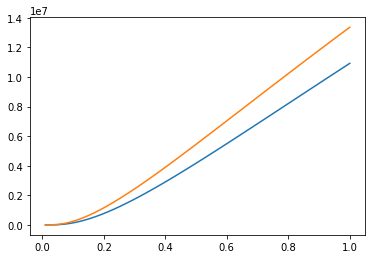

In [355]:
plt.plot(T9,rate2_q*constant_outside*(bq(q))/537970985820390.4)#,label='q=1.075')
plt.plot(T9,rate_actual/537970985820390.4)

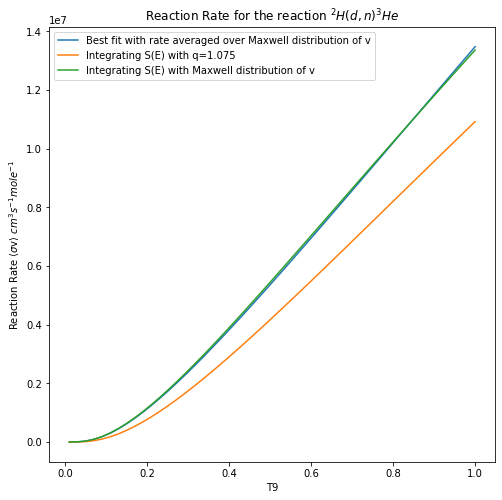

In [356]:
T912 = np.sqrt(T9)
T932 = T9*T912
T913 = T9**(1/3)
T923 = T913**2
T943 = T923**2
T953 = T9*T923
T9f = T9/(1 + 0.1071*T9)
T9f13 = T9f**(1/3)
T9f56 = T9f**(5/6)
T9e = T9/(1 + 0.1378*T9)
T9e13 = T9e**(1/3)
T9e56 = T9e**(5/6)
T9a = T9/(1 + 13.076*T9)
T9a32 = T9a**1.5
T9d = T9/(1 + 0.759*T9)
T9d13 = T9d**(1/3)
T9d56 = T9d**(5/6)
bruhh=3.95e+8/T923*np.exp(-4.259/T913)*(
            1. + .098*T913 + .765*T923 + .525*T9
            + 9.61e-3*T943 + .0167*T953)
#T9 = np.linspace(0.1,10,1000)
plt.figure(figsize=(8,8))
plt.plot(T9,bruhh,label='Best fit with rate averaged over Maxwell distribution of v')
plt.plot(T9,rate2_q*constant_outside*(bq(q))/537970985820390.4,label='Integrating S(E) with q=1.075')
plt.plot(T9,rate_actual/537970985820390.4,label='Integrating S(E) with Maxwell distribution of v')
#plt.plot(T9,fddp)
plt.xlabel(r'T9')
plt.ylabel(r'Reaction Rate $\langle\sigma$v$\rangle$ $cm^{3} s^{-1} mole^{-1}$')
plt.title(r'Reaction Rate for the reaction $^{2}H(d,n)^{3}He$')
plt.legend()

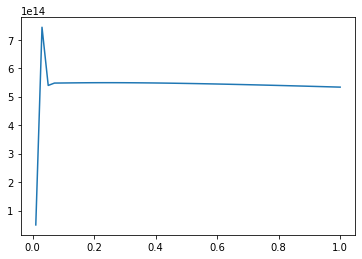

In [357]:
plt.plot(T9,rate_actual/bruhh)

In [358]:
len(T9)
np.average(rate_actual/bruhh)

537970985820390.4

Text(0, 0.5, 'Difference of reaction rates $10^{-7} cm^{3} s^{-1} mole^{-1}$')

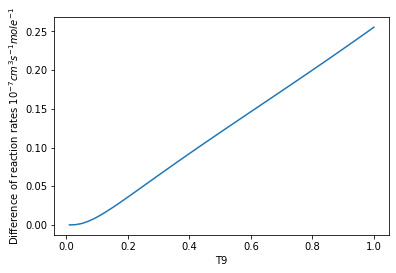

In [359]:
dat=rate2_q*constant_outside*(bq(q))/537970985820390.4
data=(bruhh-dat)/1e7
plt.plot(T9,data)
plt.xlabel(r'T9')
plt.ylabel(r'Difference of reaction rates $10^{-7} cm^{3} s^{-1} mole^{-1}$')
#plt.title(r'Reaction Rate for the reaction $^{2}H(d,n)^{3}He$')
#plt.legend()

In [360]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [361]:
poly = PolynomialFeatures(degree=1, include_bias=False)
poly_features = poly.fit_transform(T9.reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, data)
b=poly_reg_model.coef_
b0=poly_reg_model.intercept_
print(b0,b[0])

-0.015025080019524184 0.26888597843943923


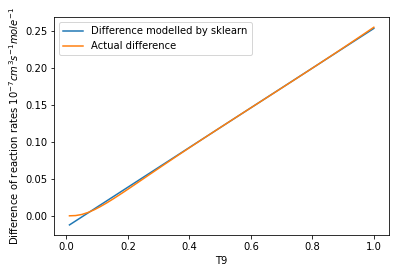

In [362]:
plt.plot(T9,b0+b[0]*T9,label='Difference modelled by sklearn')#+b[1])#*T9*T9+b[2]*T9*T9*T9+b[3]*T9*T9*T9*T9)
plt.plot(T9,data,label='Actual difference')
plt.xlabel(r'T9')
plt.ylabel(r'Difference of reaction rates $10^{-7} cm^{3} s^{-1} mole^{-1}$')
plt.legend()

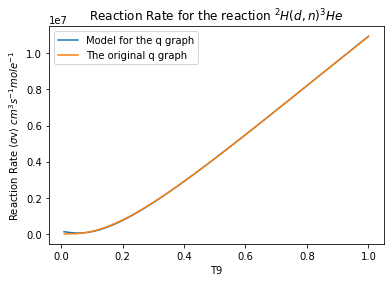

In [363]:
plt.plot(T9,bruhh-(-0.015025080019524184 +0.26888597843943923*T9)*1e7,label='Model for the q graph')#+b[1]*T9*T9+b[2]*T9*T9*T9+b[3]*T9*T9*T9*T9))
#plt.plot(T9,bruhh-(b0 +b[0]*T9)*1e7)#+b[1]*T9*T9+b[2]*T9*T9*T9+b[3]*T9*T9*T9*T9))
plt.plot(T9,rate2_q*constant_outside*(bq(q))/537970985820390.4,label='The original q graph')#,label='q=1.075')
#plt.plot(T9,rate_actual/537970985820390.4)
plt.xlabel(r'T9')
plt.ylabel(r'Reaction Rate $\langle\sigma$v$\rangle$ $cm^{3} s^{-1} mole^{-1}$')
plt.title(r'Reaction Rate for the reaction $^{2}H(d,n)^{3}He$')
plt.legend()

## ddpt

In [364]:
T9=np.linspace(0.01,1)
def S_E1(E):
    return 0.0542 + 0.205*E - 0.024*E*E
def integral1_mb(E,T9):
    return S_E1(E)*np.exp(-(E/(0.08617343*T9) + 0.9898*Zi*Zj*np.sqrt(A/E)))

In [365]:
rate1_mb=[]
for T in T9:
    rate1_mb.append(integrate.quad(integral1_mb,0,np.inf,args=(T,)))
rate1_mb=np.array(rate1_mb)

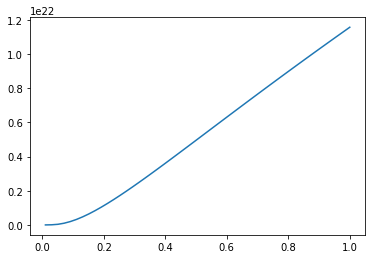

In [366]:
rate1_actual=rate1_mb[:,0]*np.sqrt(8/(np.pi*A))*(1/(0.08617343*T9)**1.5)*NA
plt.plot(T9,rate1_actual)

In [367]:
def integral1_q(E,T9,q):
    return S_E1(E)*np.exp(-0.9898*Zi*Zj*np.sqrt(A/E))*((1-(q-1)*E/(0.0861*T9))**(1/(q-1)))
rate1_q=[]
for T in T9:
    rate1_q.append(integrate.quad(integral1_q,0,0.0861*T/(q-1),args=(T,q))[0])
constant_outside = NA*((2/(np.pi*A))**0.5)*((1/(0.0861*T9))**1.5)


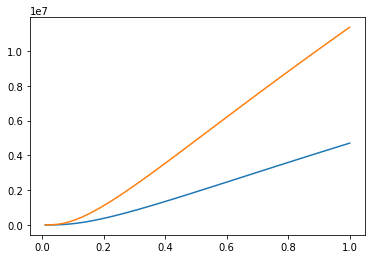

In [368]:
plt.plot(T9,rate1_q*constant_outside*(bq(q))*9.81108317797112e-16)
plt.plot(T9,rate1_actual*9.81108317797112e-16)

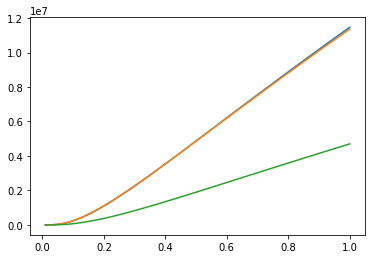

In [369]:
ratemb1=4.17e+8/T923*np.exp(-4.258/T913)*(1. + .098*T913 + .518*T923 + .355*T9- .010*T943 - .018*T953)
plt.plot(T9,ratemb1)
plt.plot(T9,rate1_actual*9.81108317797112e-16)
plt.plot(T9,rate1_q*constant_outside*(bq(q))*9.81108317797112e-16)

9.81108317797112e-16

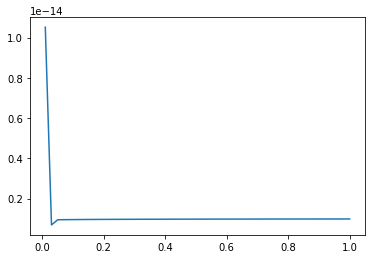

In [370]:
plt.plot(T9,ratemb1/rate1_actual)
np.average((ratemb1/rate1_actual)[5:])

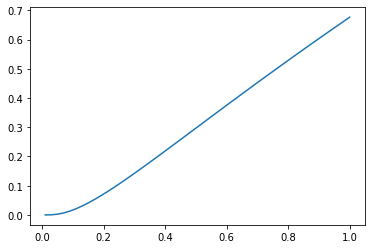

In [371]:
dat=rate1_q*constant_outside*(bq(q))*9.81108317797112e-16
data=(ratemb1-dat)/1e7
plt.plot(T9,data)

In [372]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(T9.reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, data)
b=poly_reg_model.coef_
b0=poly_reg_model.intercept_
print(b0,b[0],b[1],b[2])

-0.0181475219826851 0.33241893276000606 0.8051993459837072 -0.44992147555103057


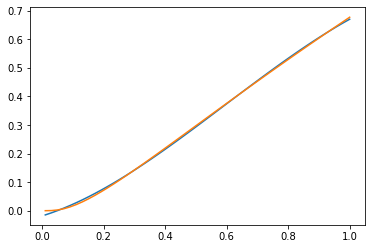

In [373]:
plt.plot(T9,b0+b[0]*T9+b[1]*T9*T9+b[2]*T9*T9*T9)#+b[3]*T9*T9*T9*T9)
plt.plot(T9,data)

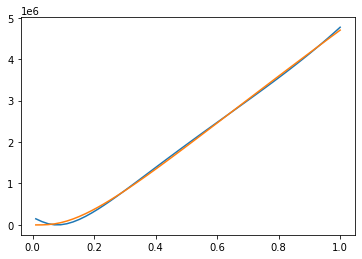

In [374]:
plt.plot(T9,ratemb1-(-0.0181475219826851 +0.33241893276000606*T9+0.8051993459837072*T9*T9-0.44992147555103057*T9*T9*T9)*1e7)#+b[3]*T9*T9*T9*T9))
#plt.plot(T9,bruhh-(b0 +b[0]*T9)*1e7)#+b[1]*T9*T9+b[2]*T9*T9*T9+b[3]*T9*T9*T9*T9))
plt.plot(T9,rate1_q*constant_outside*(bq(q))*9.81108317797112e-16)#,label='q=1.075')
#plt.plot(T9,rate_actual/537970985820390.4)

## 3He(α, γ)7Be

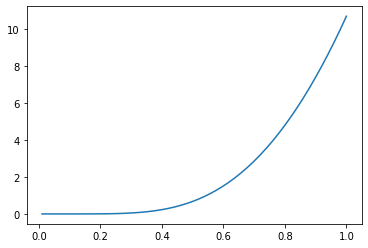

In [375]:
rate_actual4=4.817e+6/T923*np.exp(-14.964/T913)*(1. + .0325*T913 - 1.04e-3*T923 - 2.37e-4*T9- 8.11e-5*T943 - 4.69e-5*T953) + 5.938e+6*T9f56/T932*np.exp(-12.859/T9f13)
plt.plot(T9,rate_actual4)

In [376]:
m1 = 3
m2 = 4
M  = m1+m2
A  = (m1*m2)/(m1+m2)
Zi = 2
Zj = 2

Text(0.5, 1.0, '$S\\;(E)\\; for\\;the\\; reaction\\; ^{4}He(^{3}He,\\gamma)^{7}Be$')

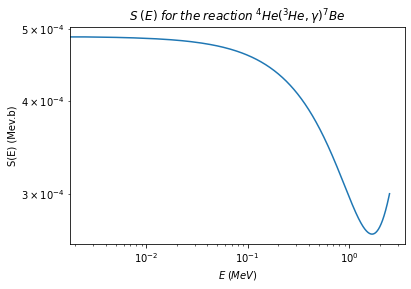

In [377]:
def S_E4(E):
    return (0.107*10**(-2) + np.exp(-0.552*E)*(-0.582*(10**(-3)) - 0.606*(10**(-3))*E - 0.154*(10**(-3))*E*E) )
E  = np.linspace(0,2.5,1000)
plt.plot(E,S_E4(E)) 
plt.yscale('log')
plt.xscale('log')
#plt.ylim((0.01,1))
#plt.xlim((10**(-3),1))
plt.xlabel(r'$E\;(MeV)$')
plt.ylabel(r'S(E) (Mev.b)')
plt.title(r'$S\;(E)\; for\;the\; reaction\; ^{4}He(^{3}He,\gamma)^{7}Be$')

In [378]:
def integral4_mb(E,T9):
    return S_E4(E)*np.exp(-(E/(0.0861*T9) + 0.9898*Zi*Zj*np.sqrt(A/E)))
rate4_mb=[]
for T in T9:
    rate4_mb.append(integrate.quad(integral4_mb,0,np.inf,args=(T,))[0])

In [379]:
def integral4_q(E,T9,q):
    return S_E4(E)*np.exp(-0.9898*Zi*Zj*np.sqrt(A/E))*((1-(q-1)*E/(0.0861*T9))**(1/(q-1)))
rate4_q=[]
for T in T9:
    rate4_q.append(integrate.quad(integral4_q,0,0.0861*T/(q-1),args=(T,q))[0])

In [380]:
constant_outside = 6.0221409*(10**23)*((2/(np.pi*A))**0.5)*((1/(0.0861*T9))**1.5)

Text(0.5, 1.0, '$Reaction\\; rates\\; for\\;the\\; reaction\\; ^{4}He(^{3}He,\\gamma)^{7}Be$')

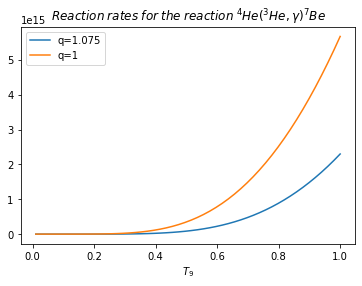

In [381]:
#plt.plot(T9,np.log(rate4_q)+np.log(constant_outside)+np.log(bq(q)),label='q=1.075')
#plt.plot(T9,np.log(rate4_mb)+np.log(constant_outside),label='q=1')
plt.plot(T9,rate4_q*constant_outside*bq(q),label='q=1.075')
plt.plot(T9,rate4_mb*constant_outside,label='q=1')
#plt.xscale('log')
plt.legend()
plt.xlabel(r'$T_{9}$')
#plt.ylabel(r'$ln\;(N_{A} \langle \;\sigma\;v \rangle)$')
plt.title(r'$Reaction\; rates\; for\;the\; reaction\; ^{4}He(^{3}He,\gamma)^{7}Be$')

1.924045208049873e-15

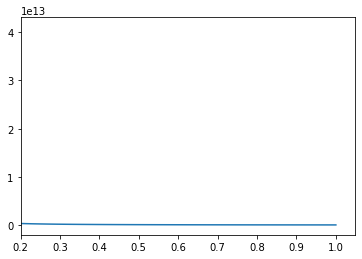

In [382]:
plt.plot(T9,rate_actual4/rate4_mb)
plt.xlim(left=0.2)
np.average((rate_actual4/(rate4_mb*constant_outside))[11:])
#rate_actual4/rate4_mb
#T9

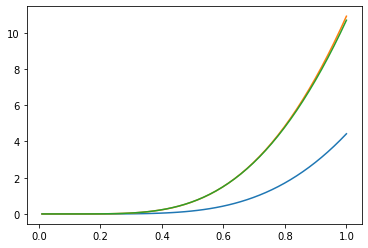

In [383]:
plt.plot(T9,rate4_q*constant_outside*bq(q)*1.924045208049873e-15,label='q=1.075')
plt.plot(T9,rate4_mb*constant_outside*1.924045208049873e-15,label='q=1')
plt.plot(T9,rate_actual4)

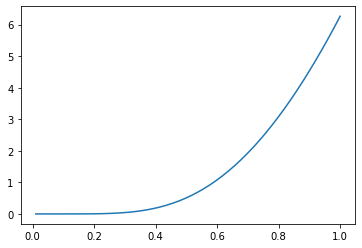

In [384]:
dat=rate4_q*constant_outside*bq(q)*1.924045208049873e-15
data=(rate_actual4-dat)
plt.plot(T9,data)

In [385]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(T9.reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, data)
b=poly_reg_model.coef_
b0=poly_reg_model.intercept_
print(b0,b[0],b[1],b[2])

0.05880133242722607 -0.7004637134775736 -0.26197283995779763 7.254907923628384


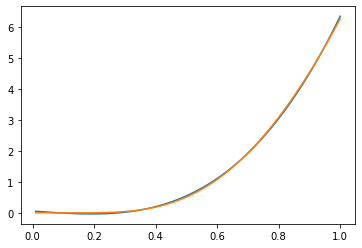

In [386]:
plt.plot(T9,b0+b[0]*T9+b[1]*T9*T9+b[2]*T9*T9*T9)#+b[3]*T9*T9*T9*T9)
plt.plot(T9,data)

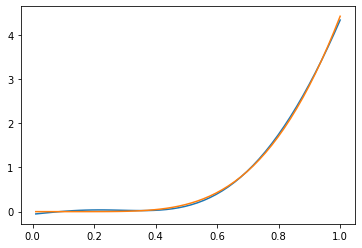

In [387]:
plt.plot(T9,rate_actual4-(0.05880133242722607 -0.7004637134775736*T9-0.26197283995779763*T9*T9+7.254907923628384*T9*T9*T9))#+b[3]*T9*T9*T9*T9))
plt.plot(T9,rate4_q*constant_outside*bq(q)*1.924045208049873e-15,label='q=1.075')

## Secondary axis to the plot

In [388]:
from BBN.expansion import expansion
T_init=1e1
T_final=1e-2
N_nu=3
T0,T1 = T_init, T_final
T, T_nu, time = expansion(10*T0, T1, N_nu)
n_step=256
t0,t1 = np.interp([T0,T1], T[::-1] , time[::-1])
t = np.geomspace(t0, t1, n_step)
#t[[0,-1]]
print(t0,t1)
#print(np.geomspace(0.00731342084953392,13214.359161699398,256))

0.00731342084953392 13214.359161699398


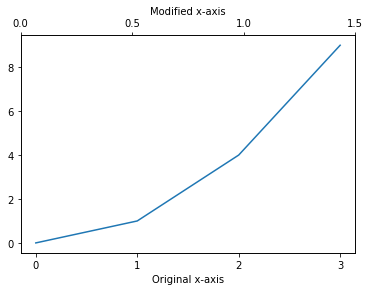

In [389]:
import matplotlib.pyplot as plt
# 1. Define data
X = [0, 1, 2, 3]
Y = [x**2 for x in X]
# 2. Define figure
fig = plt.figure()
# 3. Configure first x-axis and plot
ax1 = fig.add_subplot(111)
ax1.plot(X, Y)
ax1.set_xlabel("Original x-axis")
ax1.set_xticks(X)
# 4. Configure second x-axis
X=np.array(X)
ax2 = ax1.twiny()
ax2.set_xticks(X/2)
ax2.set_xlabel("Modified x-axis")
# 5. Make the plot visible
plt.show()

In [390]:
4.68/1.58

2.962025316455696

Text(0.5, 1.0, '$S\\;(E)\\; for\\;the\\; reaction\\; ^{4}He(^{3}He,\\gamma)^{7}Be$')

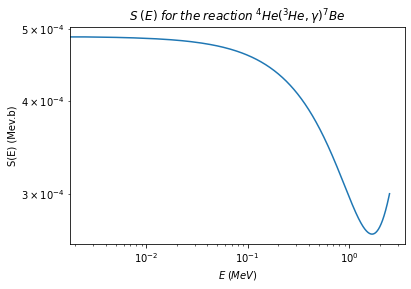

In [391]:
def S_E5(E):
    return (0.0609 + 0.173*E - 0.319*E*E + 0.217*E*E*E)
E  = np.linspace(0,2.5,1000)
plt.plot(E,S_E4(E)) 
plt.yscale('log')
plt.xscale('log')
#plt.ylim((0.01,1))
#plt.xlim((10**(-3),1))
plt.xlabel(r'$E\;(MeV)$')
plt.ylabel(r'S(E) (Mev.b)')
plt.title(r'$S\;(E)\; for\;the\; reaction\; ^{4}He(^{3}He,\gamma)^{7}Be$')

In [392]:
rate_actual5=1.096e+9/T923*np.exp(-8.472/T913) \
        - 4.830e+8*T9d56/T932*np.exp(-8.472/T9d13) \
    	+ 1.06e+10/T932*np.exp(-30.442/T9) \
        + 1.56e+5/T923*np.exp((-8.472/T913) - (T9/1.696)**2)*(
            1. + .049*T913 - 2.498*T923 + .860*T9
            + 3.518*T943 + 3.08*T953
            ) + 1.55e+6/T932*np.exp(-4.478/T9)

In [397]:
def integral5_mb(E,T9):
    return S_E5(E)*np.exp(-(E/(0.0861*T9) + 0.9898*Zi*Zj*np.sqrt(A/E)))
rate5_mb=[]
for T in T9:
    rate4_mb.append(integrate.quad(integral5_mb,0,np.inf,args=(T,))[0])

In [398]:
def integral5_q(E,T9,q):
    return S_E5(E)*np.exp(-0.9898*Zi*Zj*np.sqrt(A/E))*((1-(q-1)*E/(0.0861*T9))**(1/(q-1)))
rate5_q=[]
for T in T9:
    rate5_q.append(integrate.quad(integral5_q,0,0.0861*T/(q-1),args=(T,q))[0])

In [399]:
constant_outside = 6.0221409*(10**23)*((2/(np.pi*A))**0.5)*((1/(0.0861*T9))**1.5)

In [403]:
#plt.plot(T9,np.log(rate4_q)+np.log(constant_outside)+np.log(bq(q)),label='q=1.075')
#plt.plot(T9,np.log(rate4_mb)+np.log(constant_outside),label='q=1')
plt.plot(T9,rate5_q*constant_outside*bq(q),label='q=1.075')
plt.plot(T9,rate5_mb*constant_outside,label='q=1')
#plt.xscale('log')
plt.legend()
plt.xlabel(r'$T_{9}$')
#plt.ylabel(r'$ln\;(N_{A} \langle \;\sigma\;v \rangle)$')
plt.title(r'$Reaction\; rates\; for\;the\; reaction\; ^{4}He(^{3}He,\gamma)^{7}Be$')

TypeError: can't multiply sequence by non-int of type 'float'